In [200]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import numpy as np

In [201]:
# extraemos nuesto dataset
dataset_iris = load_iris()

In [202]:
# creamos un df con todos nuestros datos
dataset_iris.data.shape
dataset_iris.feature_names
df_iris = pd.DataFrame(dataset_iris.data, columns=dataset_iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [203]:
#separamos nuestros datos en las 3 classes existentes
dataset_iris.target_names
data_setosa = pd.DataFrame(df_iris.iloc[0:50,:],columns=dataset_iris.feature_names)
data_setosa
data_versicolor = pd.DataFrame(df_iris.iloc[50:100], columns=dataset_iris.feature_names)
data_versicolor
data_virginica = pd.DataFrame(df_iris.iloc[100:150], columns=dataset_iris.feature_names)
data_virginica.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2


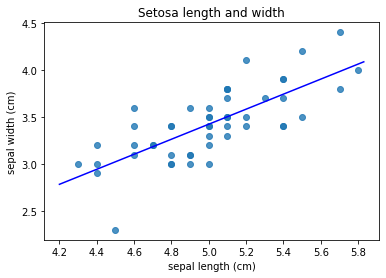

In [204]:
# grafiquemos el comportamiento de nuestras classes
# SETOSA
x = np.array(data_setosa.iloc[0:50,0])
y = np.array(data_setosa.iloc[0:50,1])
plt.scatter(x,y,alpha=.8)
plt.title('Setosa length and width')
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])

x = np.array([np.ones(len(x)),x]).T

reg = np.linalg.inv(x.T @ x) @ x.T @ y
plt.plot([4.2,5.83],[reg[0]+reg[1]*4.2, reg[0]+reg[1]*5.83], c='blue')

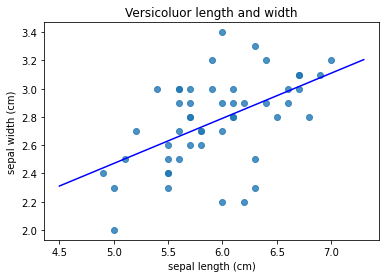

In [205]:
x = np.array(data_versicolor.iloc[0:50,0])
y = np.array(data_versicolor.iloc[0:50,1])
plt.scatter(x,y,alpha=.8)
plt.title('Versicoluor length and width')
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])

x = np.array([np.ones(len(x)),x]).T

reg = np.linalg.inv(x.T @ x) @ x.T @ y
plt.plot([4.5,7.3],[reg[0]+reg[1]*4.5, reg[0]+reg[1]*7.3], c='blue')

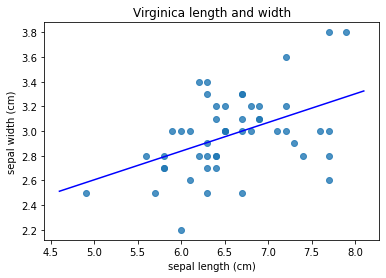

In [206]:
x = np.array(data_virginica.iloc[0:50,0])
y = np.array(data_virginica.iloc[0:50,1])
plt.scatter(x,y,alpha=.8)
plt.title('Virginica length and width')
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])

x = np.array([np.ones(len(x)),x]).T

reg = np.linalg.inv(x.T @ x) @ x.T @ y
plt.plot([4.6,8.1],[reg[0]+reg[1]*4.6, reg[0]+reg[1]*8.1], c='blue')

In [207]:
from sklearn.model_selection import train_test_split

In [136]:
'''
@_train --> conbtiene el 75% de los datos, estos datos son con los que entrenaremos el modelo
@_test --> xontine el 25% de los datos son la parte para hacer los primeros test del modelo y comparar l;os resultados
estos datos son escogidos aletoricamente(experimentos aletoricos), cada uno es un espacio muestral
'''
x_train, x_test, y_train, y_test = train_test_split(dataset_iris.data, dataset_iris.target, random_state=0)

In [208]:
'''
0 --> Sepalo
1 --> Versicolor
2 --> Virginica
estos datos estan guardados en target y en las partui
------------------------------------
en
'''
dataset_iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([1.44630542, 0.2318905 ])

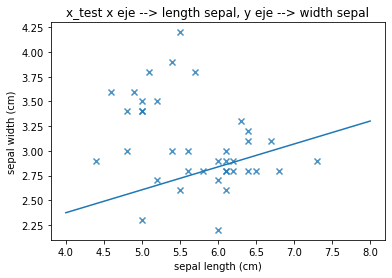

In [209]:
#x_test sepal length and width, test 25% oh the dates
xt = x_test[:,0]
yt = x_test[:,1]

plt.scatter(xt, yt, alpha=.8, marker='x')
plt.title('x_test x eje --> length sepal, y eje --> width sepal')
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])

xt = np.array([np.ones(len(xt)), xt]).T
reg = np.linalg.inv(x.T @ x) @ x.T @ y
reg
plt.plot([4,8],[reg[0]+reg[1]*4, reg[0]+reg[1]*8])
reg

array([1.44630542, 0.2318905 ])

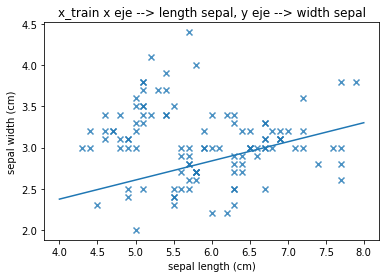

In [210]:
# x_train with 75% of the dates 
xt = x_train[:,0]
yt = x_train[:,1]

plt.scatter(xt, yt, alpha=.8, marker='x')
plt.title('x_train x eje --> length sepal, y eje --> width sepal')
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])

xt = np.array([np.ones(len(xt)), xt]).T
reg = np.linalg.inv(x.T @ x) @ x.T @ y
reg
plt.plot([4,8],[reg[0]+reg[1]*4, reg[0]+reg[1]*8])
reg

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
knn = KNeighborsClassifier(n_neighbors=1) # otorgamos al modelo el numero de vecinos cercanos


KNeighborsClassifier(n_neighbors=1)

In [215]:
print(knn.fit(x_train, y_train))

KNeighborsClassifier(n_neighbors=1)


In [219]:
# ahora buscaremos un iris segun caracteristicas dadas
#este array no existe pero buscaremos un valor cercano al que pertenece(ojo debe estar en una fila de 2d)
x_new = np.array([[5,2.9,1,0.2]]) #con dos corchetes en np.array(), nos devuelve una fila, con solo 1 nos devuelve una columna
print('x_new.shape: {}'.format(x_new.shape))
# siempre debemos crear un array de 2 dimensiones ya que sikit-learn espera eso los datos estan estructurados de esa manera


x_new.shape: (1, 4)


In [226]:
# para hacer una predicsion; llamamos al metodo 'predict' de nuestro objeto knn

prediction = knn.predict(x_new)
print('Prediction: {}'.format(prediction))
print('Prediction target name: {}'.format(dataset_iris.target_names[prediction]))
dataset_iris.data[prediction]
# este metodo sirve para buscar un modelo y predecir si este esta en nuestro data set

Prediction: [0]
Prediction target name: ['setosa']


array([[5.1, 3.5, 1.4, 0.2]])

In [250]:
df_iris[df_iris.iloc[:,0].isin([5])]
'''
si buscamos aca nuestros datos de la variable 'prediction', no encontraremos ninguna ya que 
el metodo prediction nos dice segun nuestros datos donde podria encontrarse una planta con 
estas caracteristicas segun una linal regression, muy util aprende// con target name encontramos
el tipo de flor que seria una con estas caracteristicas.
'''

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
7,5.0,3.4,1.5,0.2
25,5.0,3.0,1.6,0.2
26,5.0,3.4,1.6,0.4
35,5.0,3.2,1.2,0.2
40,5.0,3.5,1.3,0.3
43,5.0,3.5,1.6,0.6
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
93,5.0,2.3,3.3,1.0


In [256]:
#veamos la fracion para las cuales la prediccion se acerco correctamente
y_pred = knn.predict(x_test)
print('Test set predictions: {}'.format(y_pred))

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [273]:
# mean de los points muy cercanos a nuestra prediction
print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))


Test set score: 0.97


In [276]:
# tambien podemos hacerlo desde un metodo del objeto 'knn'
print('Test set score: {:.2f}'.format(knn.score(x_test, y_test)))

Test set score: 0.97
